## Unsupervised learning in Python and practical considerations

In the lecture we have introduced the unspervised learning, including clustering and Principal Component Analysis. Here is a quick summary of PCA characteristics.

- PCA, or Principal Component Analysis, is a dimensionality reduction technique used to simplify and understand high-dimensional data.
- It identifies the directions in the data (principal components) that capture the maximum amount of variation.
- PCA works by transforming the original variables into a new set of uncorrelated variables called principal components.
- The principal components are ordered in terms of the amount of variation they explain, with the first component explaining the most variation.
- PCA can also be used for feature extraction, data visualization, and removing collinearity among variables.
- PCA assumes linearity and orthogonality of the principal components, and it is sensitive to the scale of the variables.
- Interpretation of the principal components involves understanding the relationships between the original variables and the direction and magnitude of their contributions.

### Example 1: Clustering on crime data

Following is small dataset with crime related information for all 50 states plus D.C. in US. Try to perfrom the clustering on the data to see which states are similar to each other. 

In [1]:
import pandas as pd

df = pd.read_csv("us_statewide_crime.csv")
print(df.head())

C:\Users\hafid\anaconda3\envs\ds\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\hafid\anaconda3\envs\ds\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\hafid\anaconda3\envs\ds\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


        State  Violent_Crime  Murder_Rate  Poverty  High_School  College  \
0     Alabama            486          7.4     14.7         77.5     20.4   
1      Alaska            567          4.3      8.4         90.4     28.1   
2     Arizona            532          7.0     13.5         85.1     24.6   
3    Arkansas            445          6.3     15.8         81.7     18.4   
4  California            622          6.1     14.0         81.2     27.5   

   Single_Parent  Unemployed  Metropolitan  
0           26.0         4.6          70.2  
1           23.2         6.6          41.6  
2           23.5         3.9          87.9  
3           24.7         4.4          49.0  
4           21.8         4.9          96.7  


In [7]:
from sklearn.preprocessing import StandardScaler


names = df.State
X = df.drop(['State'], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

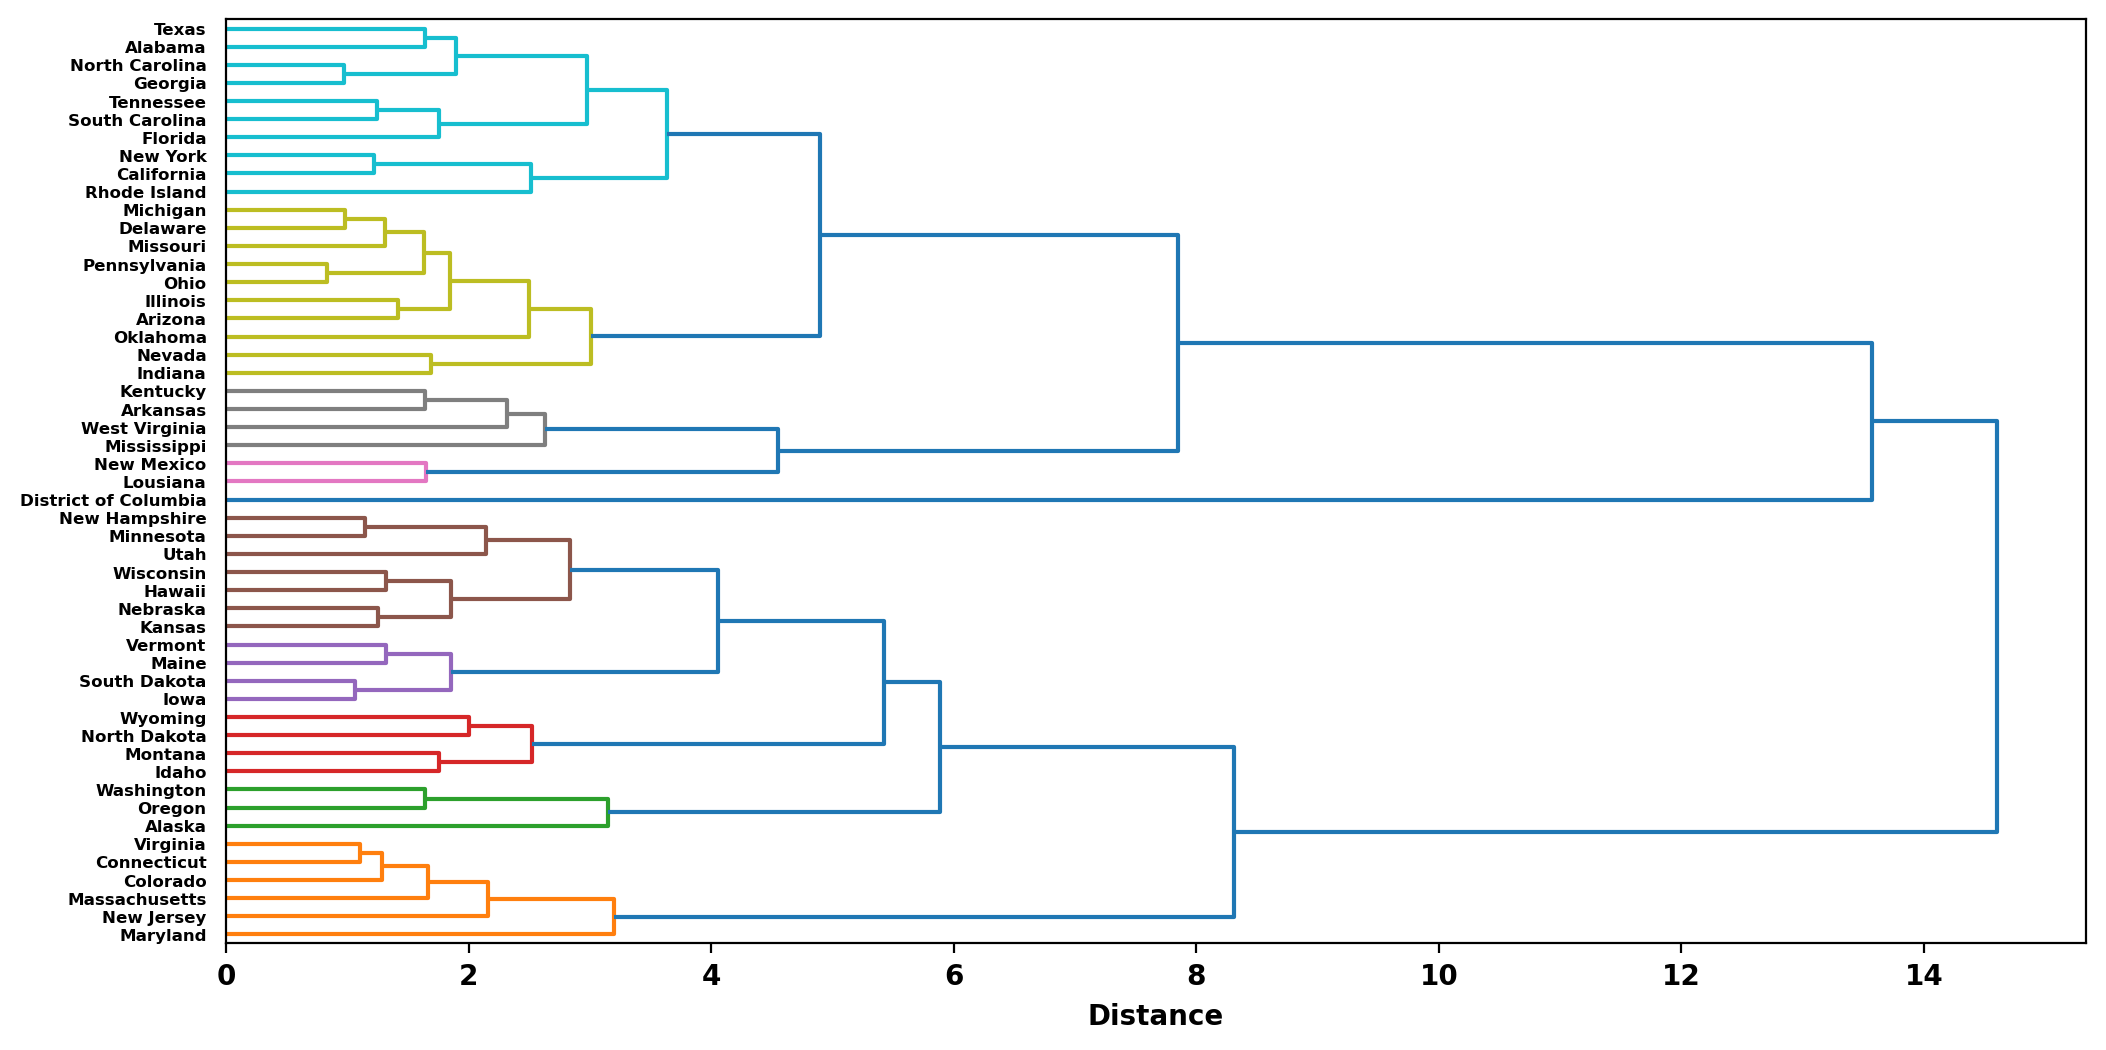

In [35]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 6), dpi=200)
# dendrogram(linkage_matrix, labels=names.values, orientation='right')
# dendrogram(linkage_matrix, labels=names.values, leaf_rotation=45)
# dendrogram(linkage_matrix, labels=names.values, truncate_mode='level', p=5)
# dendrogram(linkage_matrix, labels=names.values, truncate_mode='lastp', p=5)
dendrogram(linkage_matrix, labels=names.values, orientation='right', color_threshold=4)
plt.xlabel('Distance')
plt.show()

The link options: 
- single
- complete
- average
- centroid
- ward
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

In [39]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=4400)
kmeans_labels = kmeans.fit_predict(X_scaled)
print(kmeans_labels)

C:\Users\hafid\anaconda3\envs\ds\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0 2 3 0 3 2 3 3 1 3 0 2 2 3 3 2 2 0 0 2 3 3 3 2 0 3 2 2 3 2 3 0 3 0 2 3 3
 3 3 3 0 2 0 0 2 2 2 3 0 2 2]


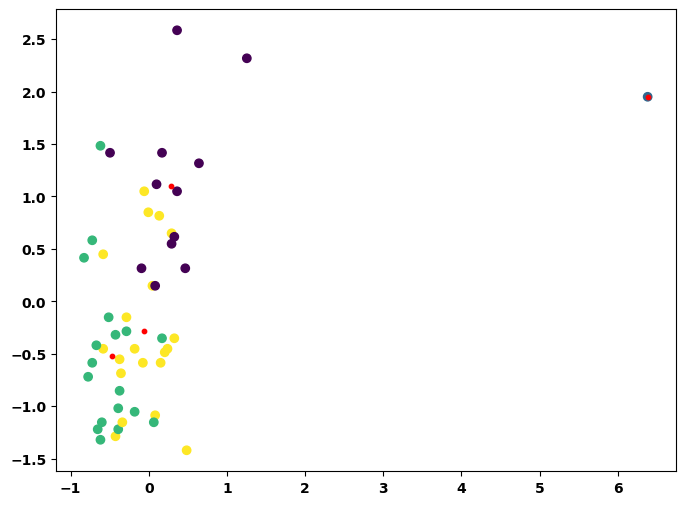

In [46]:
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,1], X_scaled[:,2], c=kmeans_labels)
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], s=10, c='red')
plt.show()

#### Example 2: Extension on the Wisconsin Breast Cancer data

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [55]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

<BarContainer object of 30 artists>

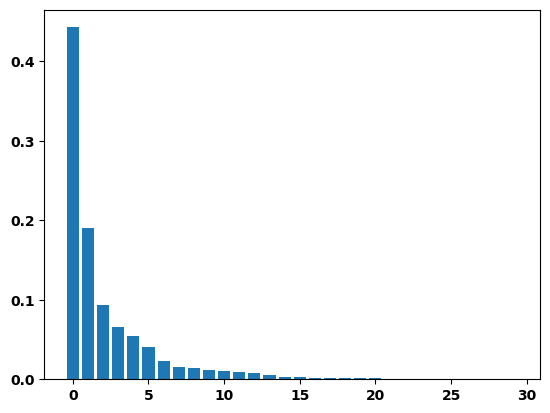

In [63]:
eigenvalues_scaled = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

plt.bar(range(len(eigenvalues_scaled)), eigenvalues_scaled)

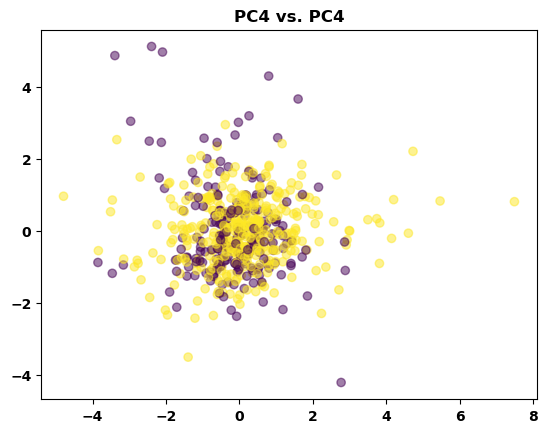

In [65]:
plt.scatter(X_pca[:,4], X_pca[:,5], c=y, alpha=0.5)
plt.title("PC4 vs. PC4")
plt.show()

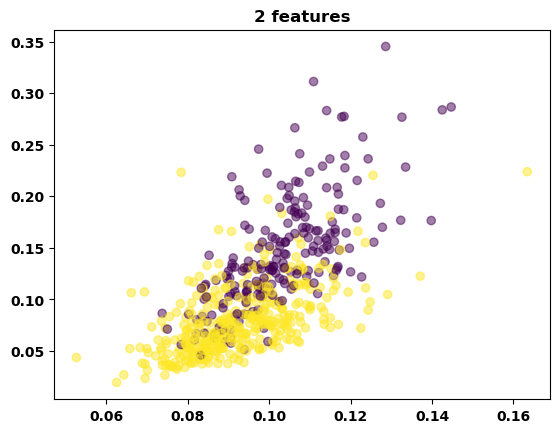

In [66]:
plt.scatter(X[:,4], X[:,5], c=y, alpha=0.5)
plt.title("2 features")
plt.show()

#### Example 3: Interpret the PCA with wine data

In [67]:
from sklearn.datasets import load_wine

# Load the Wine dataset
data = load_wine()

# Separate features (X) and target variable (y)
X = data.data
y = data.target

# Print the feature names
feature_names = data.feature_names
print(feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [72]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

print(pca.explained_variance_ratio_)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print(cumulative_variance)

[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]
[0.36198848 0.55406338 0.66529969 0.73598999 0.80162293 0.85098116
 0.89336795 0.92017544 0.94239698 0.96169717 0.97906553 0.99204785
 1.        ]


In [73]:
PC1 = pca.components_[:,0]
PC2 = pca.components_[:,1]

def biplot(score,coef,labels=None):
 
    n = coef.shape[0]
    scalex = 1.0/(PC1.max() - PC2.min())
    scaley = 1.0/(PC1.max() - PC2.min())
 
    plt.scatter(PC1 * scalex,
                PC2 * scaley, c = 'w')
 
    for i in range(n):
        plt.arrow(0, 0, 
                  coef[i,0], 
                  coef[i,1],
                  color = 'red',
                  alpha = 0.5)
 
        plt.text(coef[i,0]* 1.15, 
                 coef[i,1] * 1.15, 
                 labels[i], 
                 color = 'darkgreen', 
                 ha = 'center', 
                 va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))

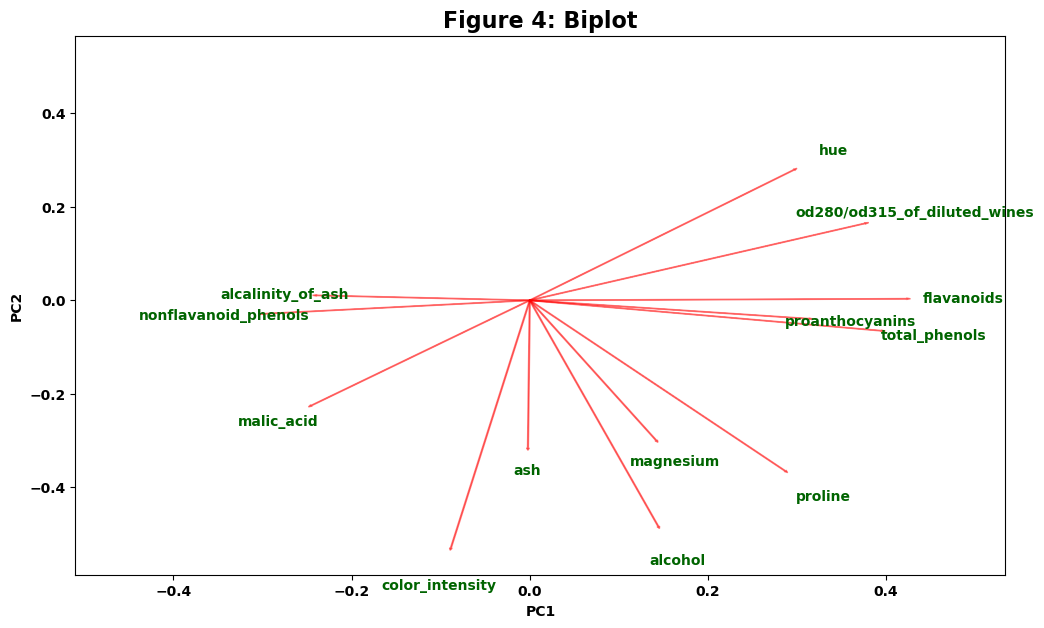

In [74]:
plt.figure(figsize=(12,7))
plt.title("Figure 4: Biplot",
          fontsize=16)
biplot(pca, 
       np.transpose(pca.components_), 
       list(feature_names))

- Features that are more horizontal contribute more to PC1
- Features that are more vertical contribute more to PC2
- Features that are in the same direction and close to each other are correlated
- Features that are in opposite directions are negatively correlated

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# fit all features to a linear regression, and print MSE
# extract the first 5 PCs and fit a linear regression, print MSE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4400)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.fit_transform(X_test_scaled)

lm_pca = LinearRegression()
lm_pca.fit(X_train_pca, y_train)

y_pred_pca = lm_pca.predict(X_test_pca)
mse_pca = mean_squared_error(y_test, y_pred_pca)
print("MSE (PCA): ", mse_pca)

lm_all = LinearRegression()
lm_all.fit(X_train_scaled, y_train)
y_pred_all = lm_all.predict(X_test_scaled)
mse_all = mean_squared_error(y_test, y_pred_all)
print("MSE (all): ", mse_all)

MSE (PCA):  1.9774848591725285
MSE (all):  0.07999711801690161


### Coding exam

Coding exam will be similar to the previous one. There are three questions: 

- Given a data with 2 features
  - Perform any necessary data pre-processing
  - Fit a Naive Bayes model
  - Fit a LDA model
  - Fit a SVM (Tune the parameter)
  - Fit a Decision tree
  - Plot the decision boundary for four models
- Given a high dimensional data
  - Fit a Random Forest (Tune the parameter)
  - Plot the variable importance plot
- A simulation interpretation question.